
# f₀ Analysis - Polyphonic Singing

This notebook explores the pitch (fundamental frequency) of a traditional polyphonic folk recording.

I used `librosa.pyin()` to extract f₀ from the full mix, and I'll later compare individual mic tracks (solo voices).

- Recording analyzed: `BMI_UK17100322_cherkasy_ositna`
- Goal: Visualize pitch over time and observe melody, harmony, and gaps



### Next Steps: individual mic recordings
- Analyze the **individual mic recordings** to get cleaner, more stable pitch contours.
- Compare f₀ ranges between singers.
- Check for moments of harmony or divergence between parts.


Found 4 audio files in 'recordings'
[→] Computing features for MIC02 from 'BMI_UK17100322_cherkasy_ositna_MIC02.mp3'...
[✓] Saved features to cache/ for MIC02


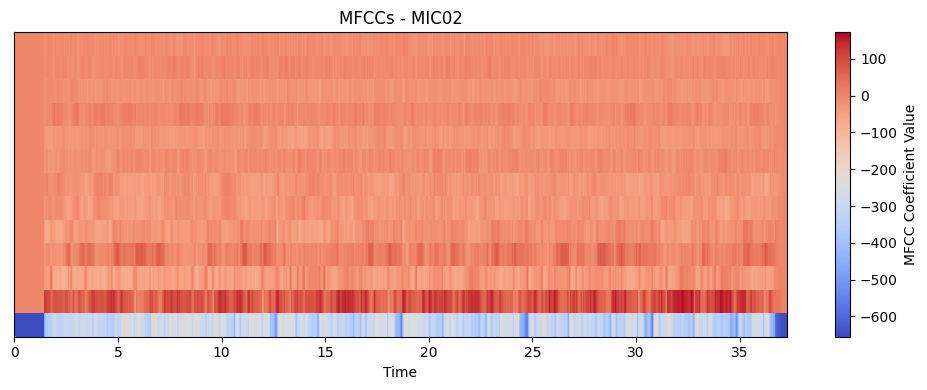

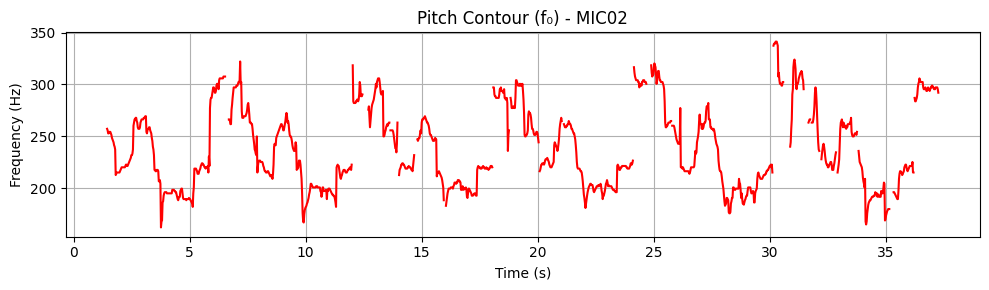

[→] Computing features for MIC03 from 'BMI_UK17100322_cherkasy_ositna_MIC03.mp3'...
[✓] Saved features to cache/ for MIC03


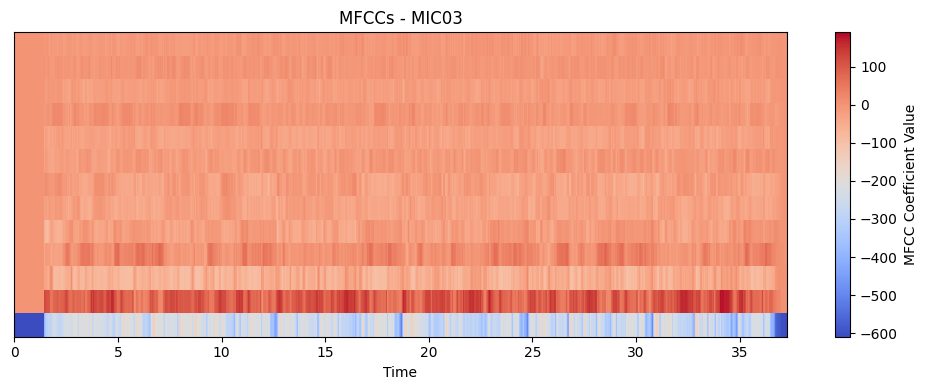

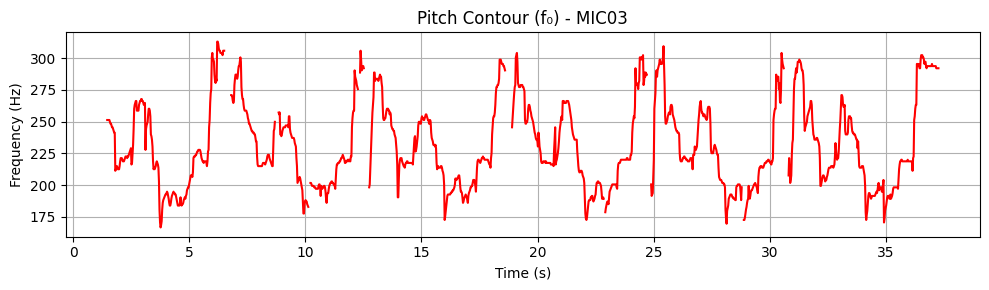

[→] Computing features for MIC05 from 'BMI_UK17100322_cherkasy_ositna_MIC05.mp3'...
[✓] Saved features to cache/ for MIC05


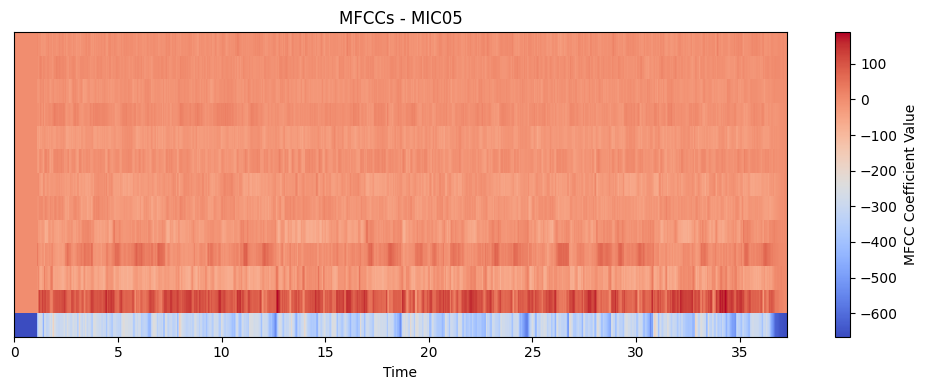

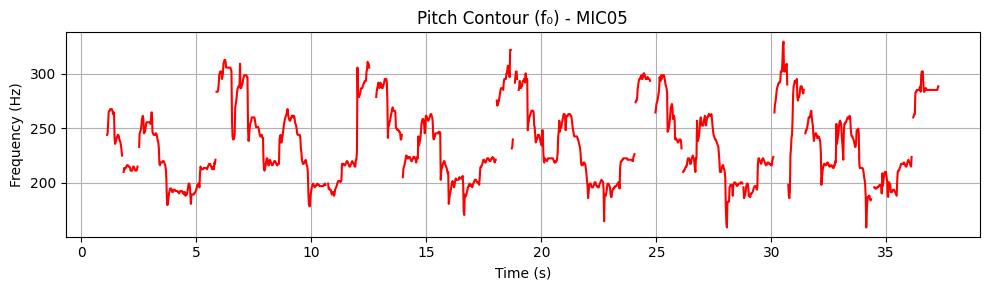

[→] Computing features for MIC06 from 'BMI_UK17100322_cherkasy_ositna_MIC06.mp3'...
[✓] Saved features to cache/ for MIC06


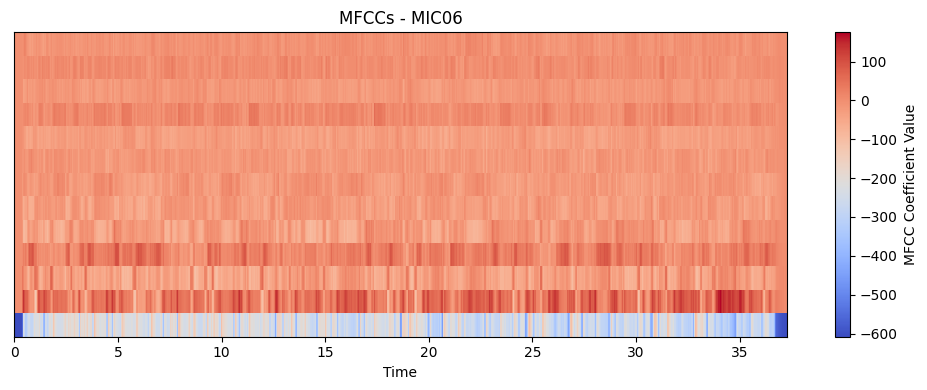

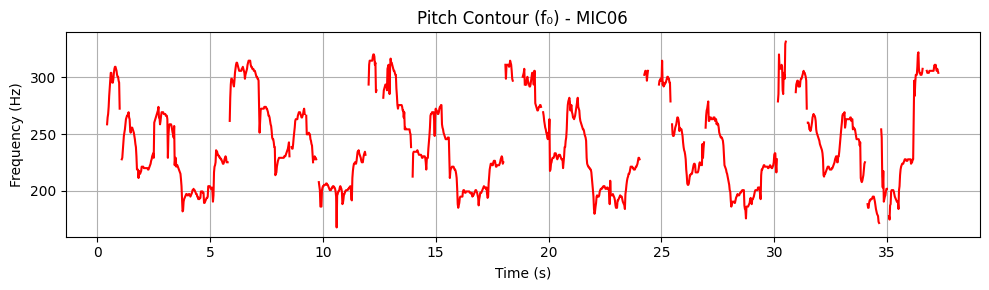

In [1]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import re

def extract_and_cache_all(recordings_dir="recordings", cache_dir="cache", sr=22050):
    os.makedirs(cache_dir, exist_ok=True)

    # Find all audio files
    audio_files = [
        f for f in os.listdir(recordings_dir)
        if f.lower().endswith(('.mp3', '.wav', '.flac', '.m4a'))
    ]

    print(f"Found {len(audio_files)} audio files in '{recordings_dir}'")
    features = {}

    for filename in audio_files:
        filepath = os.path.join(recordings_dir, filename)

        # Extract MIC label (e.g., MIC01)
        mic_match = re.search(r"(MIC\d+)", filename, re.IGNORECASE)
        if not mic_match:
            print(f"[!] Skipping file without MIC label: {filename}")
            continue

        mic_name = mic_match.group(1).upper()

        # Cache file paths
        f0_path = os.path.join(cache_dir, f"{mic_name}_f0.npy")
        mfcc_path = os.path.join(cache_dir, f"{mic_name}_mfcc.npy")

        # Load or compute features
        if os.path.exists(f0_path) and os.path.exists(mfcc_path):
            f0 = np.load(f0_path)
            mfcc = np.load(mfcc_path)
            print(f"[✓] Loaded cached features for {mic_name}")
        else:
            print(f"[→] Computing features for {mic_name} from '{filename}'...")
            y, sr = librosa.load(filepath, sr=sr)

            f0, _, _ = librosa.pyin(y, fmin=librosa.note_to_hz('C2'),
                                       fmax=librosa.note_to_hz('C6'))
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

            np.save(f0_path, f0)
            np.save(mfcc_path, mfcc)
            print(f"[✓] Saved features to cache/ for {mic_name}")

        # Store in dict for later use
        features[mic_name] = {"f0": f0, "mfcc": mfcc, "filename": filename}

        # === Plot MFCCs ===
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc, x_axis='time', sr=sr)
        plt.colorbar(label='MFCC Coefficient Value')
        plt.title(f'MFCCs - {mic_name}')
        plt.tight_layout()
        plt.show()

        # === Plot Pitch (f₀) ===
        times = librosa.times_like(f0)
        plt.figure(figsize=(10, 3))
        plt.plot(times, f0, label='f₀ (Hz)', color='r')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.title(f'Pitch Contour (f₀) - {mic_name}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return features

features = extract_and_cache_all()


